In [12]:
import pandas as pd, numpy as np

!date

Fri Sep 27 12:35:15 PDT 2019


# This code is adapted from Yongquan's to process .hdf file results for the obesity model 

In [2]:
df = pd.read_hdf('/share/costeffectiveness/results/obesity_mexico/2019_09_26_16_19_58/output.hdf')
df.shape

(38, 53058)

NOTE: current version of output file has correct number of columns (58,305), but only 38 rows... should have more like 20,000!

In [4]:
df.head()

total_population_untracked  \
input_draw_number random_seed                               
946               30                                    0   
155               0                                     0   
55                80                                    0   
482               43                                    0   
524               80                                    0   

                               total_population_tracked  total_population  \
input_draw_number random_seed                                               
946               30                              10000             10000   
155               0                               10000             10000   
55                80                              10000             10000   
482               43                              10000             10000   
524               80                              10000             10000   

                               general_healthcare_access_2019_counts  \
input_draw_number random_seed                                          
946               30                                            1359   
155               0                                             1182   
55                80                                            1484   
482               43                                            1372   
524               80                                            1223   

                               followup_healthcare_access_2019_counts  \
input_draw_number random_seed                                           
946               30                                                0   
155               0                                                 0   
55                80                                                0   
482               43                                                0   
524               80                                                0   

                               general_healthcare_access_2020_counts  \
input_draw_number random_seed                                          
946               30                                            1385   
155               0                                             1274   
55                80                                            1387   
482               43                                            1392   
524               80                                            1233   

                               followup_healthcare_access_2020_counts  \
input_draw_number random_seed                                           
946               30                                                0   
155               0                                                 0   
55                80                                                0   
482               43                                                0   
524               80                                                0   

                               general_healthcare_access_2021_counts  \
input_draw_number random_seed                                          
946               30                                            1417   
155               0                                             1271   
55                80                                            1428   
482               43                                            1469   
524               80                                            1276   

                               followup_healthcare_access_2021_counts  \
input_draw_number random_seed                                           
946               30                                                0   
155               0                                                 0   
55                80                                                0   
482               43                                                0   
524               80                                                0   

            

In [155]:
# create some template series for what we ultimately want the output to look like... will come back to these

cause_names = ['ischemic_heart_disease', 'ischemic_stroke', 'diabetes_mellitus_type_2',
               'asthma', 'gout', 
               'chronic_kidney_disease_due_to_hypertension',
               'chronic_kidney_disease_due_to_glomerulonephritis',
               'chronic_kidney_disease_due_to_other_and_unspecified_causes',
               'chronic_kidney_disease_due_to_diabetes_mellitus_type_2',
               'other_causes'
              ]

template_cols = ['cause', 'year', 'sex', 'age_group', 'bmi_group', 'measure', 'scenario', 'input_draw']

years = list(map(lambda x: str(x), np.arange(2020, 2026)))
# this years list creates a series that looks like 2020, 2021, 2022, ...

## Change treatment proportion to "scenario" variable

In [156]:
# create a function that makes a copy of the dataframe and reworks the treatment proporiton variable to 
# display as baseline and treatment scenarios instead; also groups data by treatment scenario as well as input_draw

def clean_and_aggregate(data):
    r = data.copy()
    r.loc[:, 'scenario'] = r['bmi_treatment.treatment_proportion'].map({0: 'baseline', 1: 'treatment'})
    r = r.groupby(['scenario', 'input_draw']).sum()
    return r

In [157]:
%%time

r = clean_and_aggregate(df)
r.head()

CPU times: user 239 ms, sys: 30.1 ms, total: 270 ms
Wall time: 266 ms


total_population_untracked  total_population_tracked  \
scenario input_draw                                                         
baseline 3                                    0                     20000   
         29                                   0                     10000   
         55                                   0                     10000   
         78                                   0                     10000   
         155                                  0                     10000   

                     total_population  general_healthcare_access_2019_counts  \
scenario input_draw                                                            
baseline 3                      20000                                   2807   
         29                     10000                                   1311   
         55                     10000                                   1451   
         78                     10000                                   1145   
         155                    10000                                   1219   

                     followup_healthcare_access_2019_counts  \
scenario input_draw                                           
baseline 3                                                0   
         29                                               0   
         55                                               0   
         78                                               0   
         155                                              0   

                     general_healthcare_access_2020_counts  \
scenario input_draw                                          
baseline 3                                            2808   
         29                                           1454   
         55                                           1408   
         78                                           1105   
         155                                          1249   

                     followup_healthcare_access_2020_counts  \
scenario input_draw                                           
baseline 3                                                0   
         29                                               0   
         55                                               0   
         78                                               0   
         155                                              0   

                     general_healthcare_access_2021_counts  \
scenario input_draw                                          
baseline 3                                            2849   
         29                                           1361   
         55                                           1506   
         78                                           1186   
         155                                          1294   

                     followup_healthcare_access_2021_counts  \
scenario input_draw                                           
baseline 3                                                0   
         29                                               0   
         55                                               0   
         78                                               0   
         155                                              0   

                     general_healthcare_access_2022_counts  ...  \
scenario input_draw                                         ...   
baseline 3                                            2887  ...   
         29                                           1321  ...   
         55                                           1411  ...   
         78                                           1140  ...   
         155                                          1271  ...   

                     chronic_kidney_disease_due_to_hypertension_event_count  \
scenario input_draw                                                           
baseline 3                                                          44        
         29      

## Turning existing columns into workable columns

In [25]:
for col in df.columns:
    print(col)

total_population_untracked
total_population_tracked
total_population
general_healthcare_access_2019_counts
followup_healthcare_access_2019_counts
general_healthcare_access_2020_counts
followup_healthcare_access_2020_counts
general_healthcare_access_2021_counts
followup_healthcare_access_2021_counts
general_healthcare_access_2022_counts
followup_healthcare_access_2022_counts
general_healthcare_access_2023_counts
followup_healthcare_access_2023_counts
general_healthcare_access_2024_counts
followup_healthcare_access_2024_counts
general_healthcare_access_2025_counts
followup_healthcare_access_2025_counts
general_healthcare_access_2019_cost
followup_healthcare_access_2019_cost
general_healthcare_access_2020_cost
followup_healthcare_access_2020_cost
general_healthcare_access_2021_cost
followup_healthcare_access_2021_cost
general_healthcare_access_2022_cost
followup_healthcare_access_2022_cost
general_healthcare_access_2023_cost
followup_healthcare_access_2023_cost
general_healthcare_access_2

death_due_to_ischemic_stroke_in_2020_among_female_in_age_group_post_neonatal_among_bmi_group_(0, 27)
death_due_to_ischemic_stroke_in_2020_among_male_in_age_group_1_to_4_among_bmi_group_(0, 27)
death_due_to_ischemic_stroke_in_2020_among_female_in_age_group_1_to_4_among_bmi_group_(0, 27)
death_due_to_ischemic_stroke_in_2020_among_male_in_age_group_5_to_9_among_bmi_group_(0, 27)
death_due_to_ischemic_stroke_in_2020_among_female_in_age_group_5_to_9_among_bmi_group_(0, 27)
death_due_to_ischemic_stroke_in_2020_among_male_in_age_group_10_to_14_among_bmi_group_(0, 27)
death_due_to_ischemic_stroke_in_2020_among_female_in_age_group_10_to_14_among_bmi_group_(0, 27)
death_due_to_ischemic_stroke_in_2020_among_male_in_age_group_15_to_19_among_bmi_group_(0, 27)
death_due_to_ischemic_stroke_in_2020_among_female_in_age_group_15_to_19_among_bmi_group_(0, 27)
death_due_to_ischemic_stroke_in_2020_among_male_in_age_group_20_to_24_among_bmi_group_(0, 27)
death_due_to_ischemic_stroke_in_2020_among_female_in_

death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2022_among_male_in_age_group_10_to_14_among_bmi_group_(0, 27)
death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2022_among_female_in_age_group_10_to_14_among_bmi_group_(0, 27)
death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2022_among_male_in_age_group_15_to_19_among_bmi_group_(0, 27)
death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2022_among_female_in_age_group_15_to_19_among_bmi_group_(0, 27)
death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2022_among_male_in_age_group_20_to_24_among_bmi_group_(0, 27)
death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2022_among_female_in_age_group_20_to_24_among_bmi_group_(0, 27)
death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2022_among_male_in_age_group_25_to_29_among_bmi_group_(0, 27)
death_due_to_chronic_kidney_disease

death_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2025_among_female_in_age_group_early_neonatal_among_bmi_group_(0, 27)
death_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2025_among_male_in_age_group_late_neonatal_among_bmi_group_(0, 27)
death_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2025_among_female_in_age_group_late_neonatal_among_bmi_group_(0, 27)
death_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2025_among_male_in_age_group_post_neonatal_among_bmi_group_(0, 27)
death_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2025_among_female_in_age_group_post_neonatal_among_bmi_group_(0, 27)
death_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2025_among_male_in_age_group_1_to_4_among_bmi_group_(0, 27)
death_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2025_among_female_in_age_group_1_to_4_among_bmi_group_(0, 27)
death_due_to_chronic_kidney_disease_due

ylls_due_to_diabetes_mellitus_type_2_in_2020_among_female_in_age_group_95_plus_among_bmi_group_(0, 27)
ylls_due_to_asthma_in_2020_among_male_in_age_group_early_neonatal_among_bmi_group_(0, 27)
ylls_due_to_asthma_in_2020_among_female_in_age_group_early_neonatal_among_bmi_group_(0, 27)
ylls_due_to_asthma_in_2020_among_male_in_age_group_late_neonatal_among_bmi_group_(0, 27)
ylls_due_to_asthma_in_2020_among_female_in_age_group_late_neonatal_among_bmi_group_(0, 27)
ylls_due_to_asthma_in_2020_among_male_in_age_group_post_neonatal_among_bmi_group_(0, 27)
ylls_due_to_asthma_in_2020_among_female_in_age_group_post_neonatal_among_bmi_group_(0, 27)
ylls_due_to_asthma_in_2020_among_male_in_age_group_1_to_4_among_bmi_group_(0, 27)
ylls_due_to_asthma_in_2020_among_female_in_age_group_1_to_4_among_bmi_group_(0, 27)
ylls_due_to_asthma_in_2020_among_male_in_age_group_5_to_9_among_bmi_group_(0, 27)
ylls_due_to_asthma_in_2020_among_female_in_age_group_5_to_9_among_bmi_group_(0, 27)
ylls_due_to_asthma_in_2

ylls_due_to_gout_in_2022_among_male_in_age_group_1_to_4_among_bmi_group_(0, 27)
ylls_due_to_gout_in_2022_among_female_in_age_group_1_to_4_among_bmi_group_(0, 27)
ylls_due_to_gout_in_2022_among_male_in_age_group_5_to_9_among_bmi_group_(0, 27)
ylls_due_to_gout_in_2022_among_female_in_age_group_5_to_9_among_bmi_group_(0, 27)
ylls_due_to_gout_in_2022_among_male_in_age_group_10_to_14_among_bmi_group_(0, 27)
ylls_due_to_gout_in_2022_among_female_in_age_group_10_to_14_among_bmi_group_(0, 27)
ylls_due_to_gout_in_2022_among_male_in_age_group_15_to_19_among_bmi_group_(0, 27)
ylls_due_to_gout_in_2022_among_female_in_age_group_15_to_19_among_bmi_group_(0, 27)
ylls_due_to_gout_in_2022_among_male_in_age_group_20_to_24_among_bmi_group_(0, 27)
ylls_due_to_gout_in_2022_among_female_in_age_group_20_to_24_among_bmi_group_(0, 27)
ylls_due_to_gout_in_2022_among_male_in_age_group_25_to_29_among_bmi_group_(0, 27)
ylls_due_to_gout_in_2022_among_female_in_age_group_25_to_29_among_bmi_group_(0, 27)
ylls_due_to_

ylls_due_to_gout_in_2024_among_male_in_age_group_5_to_9_among_bmi_group_(0, 27)
ylls_due_to_gout_in_2024_among_female_in_age_group_5_to_9_among_bmi_group_(0, 27)
ylls_due_to_gout_in_2024_among_male_in_age_group_10_to_14_among_bmi_group_(0, 27)
ylls_due_to_gout_in_2024_among_female_in_age_group_10_to_14_among_bmi_group_(0, 27)
ylls_due_to_gout_in_2024_among_male_in_age_group_15_to_19_among_bmi_group_(0, 27)
ylls_due_to_gout_in_2024_among_female_in_age_group_15_to_19_among_bmi_group_(0, 27)
ylls_due_to_gout_in_2024_among_male_in_age_group_20_to_24_among_bmi_group_(0, 27)
ylls_due_to_gout_in_2024_among_female_in_age_group_20_to_24_among_bmi_group_(0, 27)
ylls_due_to_gout_in_2024_among_male_in_age_group_25_to_29_among_bmi_group_(0, 27)
ylls_due_to_gout_in_2024_among_female_in_age_group_25_to_29_among_bmi_group_(0, 27)
ylls_due_to_gout_in_2024_among_male_in_age_group_30_to_34_among_bmi_group_(0, 27)
ylls_due_to_gout_in_2024_among_female_in_age_group_30_to_34_among_bmi_group_(0, 27)
ylls_due

person_time_in_2023_among_male_in_age_group_60_to_64_among_bmi_group_(27, 30)
person_time_in_2023_among_female_in_age_group_60_to_64_among_bmi_group_(27, 30)
person_time_in_2023_among_male_in_age_group_65_to_69_among_bmi_group_(27, 30)
person_time_in_2023_among_female_in_age_group_65_to_69_among_bmi_group_(27, 30)
person_time_in_2023_among_male_in_age_group_70_to_74_among_bmi_group_(27, 30)
person_time_in_2023_among_female_in_age_group_70_to_74_among_bmi_group_(27, 30)
person_time_in_2023_among_male_in_age_group_75_to_79_among_bmi_group_(27, 30)
person_time_in_2023_among_female_in_age_group_75_to_79_among_bmi_group_(27, 30)
person_time_in_2023_among_male_in_age_group_80_to_84_among_bmi_group_(27, 30)
person_time_in_2023_among_female_in_age_group_80_to_84_among_bmi_group_(27, 30)
person_time_in_2023_among_male_in_age_group_85_to_89_among_bmi_group_(27, 30)
person_time_in_2023_among_female_in_age_group_85_to_89_among_bmi_group_(27, 30)
person_time_in_2023_among_male_in_age_group_90_to_94

death_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2020_among_female_in_age_group_60_to_64_among_bmi_group_(27, 30)
death_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2020_among_male_in_age_group_65_to_69_among_bmi_group_(27, 30)
death_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2020_among_female_in_age_group_65_to_69_among_bmi_group_(27, 30)
death_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2020_among_male_in_age_group_70_to_74_among_bmi_group_(27, 30)
death_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2020_among_female_in_age_group_70_to_74_among_bmi_group_(27, 30)
death_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2020_among_male_in_age_group_75_to_79_among_bmi_group_(27, 30)
death_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2020_among_female_in_age_group_75_to_79_among_bmi_group_(27, 30)
death_due_to_chronic_kidney_disease_due_to_diabetes_me

death_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2022_among_female_in_age_group_95_plus_among_bmi_group_(27, 30)
death_due_to_other_causes_in_2022_among_male_in_age_group_early_neonatal_among_bmi_group_(27, 30)
death_due_to_other_causes_in_2022_among_female_in_age_group_early_neonatal_among_bmi_group_(27, 30)
death_due_to_other_causes_in_2022_among_male_in_age_group_late_neonatal_among_bmi_group_(27, 30)
death_due_to_other_causes_in_2022_among_female_in_age_group_late_neonatal_among_bmi_group_(27, 30)
death_due_to_other_causes_in_2022_among_male_in_age_group_post_neonatal_among_bmi_group_(27, 30)
death_due_to_other_causes_in_2022_among_female_in_age_group_post_neonatal_among_bmi_group_(27, 30)
death_due_to_other_causes_in_2022_among_male_in_age_group_1_to_4_among_bmi_group_(27, 30)
death_due_to_other_causes_in_2022_among_female_in_age_group_1_to_4_among_bmi_group_(27, 30)
death_due_to_other_causes_in_2022_among_male_in_age_group_5_to_9_among_bmi_group_(27, 30)
dea

death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2025_among_male_in_age_group_45_to_49_among_bmi_group_(27, 30)
death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2025_among_female_in_age_group_45_to_49_among_bmi_group_(27, 30)
death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2025_among_male_in_age_group_50_to_54_among_bmi_group_(27, 30)
death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2025_among_female_in_age_group_50_to_54_among_bmi_group_(27, 30)
death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2025_among_male_in_age_group_55_to_59_among_bmi_group_(27, 30)
death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2025_among_female_in_age_group_55_to_59_among_bmi_group_(27, 30)
death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2025_among_male_in_age_group_60_to_64_among_bmi_group_(27, 30)
death_due_to_chronic_kidney_

ylls_due_to_gout_in_2020_among_female_in_age_group_10_to_14_among_bmi_group_(27, 30)
ylls_due_to_gout_in_2020_among_male_in_age_group_15_to_19_among_bmi_group_(27, 30)
ylls_due_to_gout_in_2020_among_female_in_age_group_15_to_19_among_bmi_group_(27, 30)
ylls_due_to_gout_in_2020_among_male_in_age_group_20_to_24_among_bmi_group_(27, 30)
ylls_due_to_gout_in_2020_among_female_in_age_group_20_to_24_among_bmi_group_(27, 30)
ylls_due_to_gout_in_2020_among_male_in_age_group_25_to_29_among_bmi_group_(27, 30)
ylls_due_to_gout_in_2020_among_female_in_age_group_25_to_29_among_bmi_group_(27, 30)
ylls_due_to_gout_in_2020_among_male_in_age_group_30_to_34_among_bmi_group_(27, 30)
ylls_due_to_gout_in_2020_among_female_in_age_group_30_to_34_among_bmi_group_(27, 30)
ylls_due_to_gout_in_2020_among_male_in_age_group_35_to_39_among_bmi_group_(27, 30)
ylls_due_to_gout_in_2020_among_female_in_age_group_35_to_39_among_bmi_group_(27, 30)
ylls_due_to_gout_in_2020_among_male_in_age_group_40_to_44_among_bmi_group_(

ylls_due_to_chronic_kidney_disease_due_to_hypertension_in_2022_among_female_in_age_group_15_to_19_among_bmi_group_(27, 30)
ylls_due_to_chronic_kidney_disease_due_to_hypertension_in_2022_among_male_in_age_group_20_to_24_among_bmi_group_(27, 30)
ylls_due_to_chronic_kidney_disease_due_to_hypertension_in_2022_among_female_in_age_group_20_to_24_among_bmi_group_(27, 30)
ylls_due_to_chronic_kidney_disease_due_to_hypertension_in_2022_among_male_in_age_group_25_to_29_among_bmi_group_(27, 30)
ylls_due_to_chronic_kidney_disease_due_to_hypertension_in_2022_among_female_in_age_group_25_to_29_among_bmi_group_(27, 30)
ylls_due_to_chronic_kidney_disease_due_to_hypertension_in_2022_among_male_in_age_group_30_to_34_among_bmi_group_(27, 30)
ylls_due_to_chronic_kidney_disease_due_to_hypertension_in_2022_among_female_in_age_group_30_to_34_among_bmi_group_(27, 30)
ylls_due_to_chronic_kidney_disease_due_to_hypertension_in_2022_among_male_in_age_group_35_to_39_among_bmi_group_(27, 30)
ylls_due_to_chronic_kidn

ylls_due_to_gout_in_2025_among_female_in_age_group_10_to_14_among_bmi_group_(27, 30)
ylls_due_to_gout_in_2025_among_male_in_age_group_15_to_19_among_bmi_group_(27, 30)
ylls_due_to_gout_in_2025_among_female_in_age_group_15_to_19_among_bmi_group_(27, 30)
ylls_due_to_gout_in_2025_among_male_in_age_group_20_to_24_among_bmi_group_(27, 30)
ylls_due_to_gout_in_2025_among_female_in_age_group_20_to_24_among_bmi_group_(27, 30)
ylls_due_to_gout_in_2025_among_male_in_age_group_25_to_29_among_bmi_group_(27, 30)
ylls_due_to_gout_in_2025_among_female_in_age_group_25_to_29_among_bmi_group_(27, 30)
ylls_due_to_gout_in_2025_among_male_in_age_group_30_to_34_among_bmi_group_(27, 30)
ylls_due_to_gout_in_2025_among_female_in_age_group_30_to_34_among_bmi_group_(27, 30)
ylls_due_to_gout_in_2025_among_male_in_age_group_35_to_39_among_bmi_group_(27, 30)
ylls_due_to_gout_in_2025_among_female_in_age_group_35_to_39_among_bmi_group_(27, 30)
ylls_due_to_gout_in_2025_among_male_in_age_group_40_to_44_among_bmi_group_(

death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2019_among_female_in_age_group_40_to_44_among_bmi_group_(30, 35)
death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2019_among_male_in_age_group_45_to_49_among_bmi_group_(30, 35)
death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2019_among_female_in_age_group_45_to_49_among_bmi_group_(30, 35)
death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2019_among_male_in_age_group_50_to_54_among_bmi_group_(30, 35)
death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2019_among_female_in_age_group_50_to_54_among_bmi_group_(30, 35)
death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2019_among_male_in_age_group_55_to_59_among_bmi_group_(30, 35)
death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2019_among_female_in_age_group_55_to_59_among_bmi_group_(30, 35)
death_due_to_chronic_kidne

death_due_to_ischemic_heart_disease_in_2022_among_female_in_age_group_post_neonatal_among_bmi_group_(30, 35)
death_due_to_ischemic_heart_disease_in_2022_among_male_in_age_group_1_to_4_among_bmi_group_(30, 35)
death_due_to_ischemic_heart_disease_in_2022_among_female_in_age_group_1_to_4_among_bmi_group_(30, 35)
death_due_to_ischemic_heart_disease_in_2022_among_male_in_age_group_5_to_9_among_bmi_group_(30, 35)
death_due_to_ischemic_heart_disease_in_2022_among_female_in_age_group_5_to_9_among_bmi_group_(30, 35)
death_due_to_ischemic_heart_disease_in_2022_among_male_in_age_group_10_to_14_among_bmi_group_(30, 35)
death_due_to_ischemic_heart_disease_in_2022_among_female_in_age_group_10_to_14_among_bmi_group_(30, 35)
death_due_to_ischemic_heart_disease_in_2022_among_male_in_age_group_15_to_19_among_bmi_group_(30, 35)
death_due_to_ischemic_heart_disease_in_2022_among_female_in_age_group_15_to_19_among_bmi_group_(30, 35)
death_due_to_ischemic_heart_disease_in_2022_among_male_in_age_group_20_to_2

death_due_to_other_causes_in_2024_among_male_in_age_group_45_to_49_among_bmi_group_(30, 35)
death_due_to_other_causes_in_2024_among_female_in_age_group_45_to_49_among_bmi_group_(30, 35)
death_due_to_other_causes_in_2024_among_male_in_age_group_50_to_54_among_bmi_group_(30, 35)
death_due_to_other_causes_in_2024_among_female_in_age_group_50_to_54_among_bmi_group_(30, 35)
death_due_to_other_causes_in_2024_among_male_in_age_group_55_to_59_among_bmi_group_(30, 35)
death_due_to_other_causes_in_2024_among_female_in_age_group_55_to_59_among_bmi_group_(30, 35)
death_due_to_other_causes_in_2024_among_male_in_age_group_60_to_64_among_bmi_group_(30, 35)
death_due_to_other_causes_in_2024_among_female_in_age_group_60_to_64_among_bmi_group_(30, 35)
death_due_to_other_causes_in_2024_among_male_in_age_group_65_to_69_among_bmi_group_(30, 35)
death_due_to_other_causes_in_2024_among_female_in_age_group_65_to_69_among_bmi_group_(30, 35)
death_due_to_other_causes_in_2024_among_male_in_age_group_70_to_74_amo

ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2019_among_male_in_age_group_55_to_59_among_bmi_group_(30, 35)
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2019_among_female_in_age_group_55_to_59_among_bmi_group_(30, 35)
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2019_among_male_in_age_group_60_to_64_among_bmi_group_(30, 35)
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2019_among_female_in_age_group_60_to_64_among_bmi_group_(30, 35)
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2019_among_male_in_age_group_65_to_69_among_bmi_group_(30, 35)
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2019_among_female_in_age_group_65_to_69_among_bmi_group_(30, 35)
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2019_among_male_in_age_group_70_to_74_among_bmi_group_(30, 35)
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2019_among_female_in_age_group_70_to_74_a

ylls_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2021_among_male_in_age_group_55_to_59_among_bmi_group_(30, 35)
ylls_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2021_among_female_in_age_group_55_to_59_among_bmi_group_(30, 35)
ylls_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2021_among_male_in_age_group_60_to_64_among_bmi_group_(30, 35)
ylls_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2021_among_female_in_age_group_60_to_64_among_bmi_group_(30, 35)
ylls_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2021_among_male_in_age_group_65_to_69_among_bmi_group_(30, 35)
ylls_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2021_among_female_in_age_group_65_to_69_among_bmi_group_(30, 35)
ylls_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2021_among_male_in_age_group_70_to_74_among_bmi_group_(30, 35)
ylls_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_typ

ylls_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2024_among_female_in_age_group_5_to_9_among_bmi_group_(30, 35)
ylls_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2024_among_male_in_age_group_10_to_14_among_bmi_group_(30, 35)
ylls_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2024_among_female_in_age_group_10_to_14_among_bmi_group_(30, 35)
ylls_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2024_among_male_in_age_group_15_to_19_among_bmi_group_(30, 35)
ylls_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2024_among_female_in_age_group_15_to_19_among_bmi_group_(30, 35)
ylls_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2024_among_male_in_age_group_20_to_24_among_bmi_group_(30, 35)
ylls_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2024_among_female_in_age_group_20_to_24_among_bmi_group_(30, 35)
ylls_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_typ

death_due_to_diabetes_mellitus_type_2_in_2019_among_female_in_age_group_65_to_69_among_bmi_group_(35, 40)
death_due_to_diabetes_mellitus_type_2_in_2019_among_male_in_age_group_70_to_74_among_bmi_group_(35, 40)
death_due_to_diabetes_mellitus_type_2_in_2019_among_female_in_age_group_70_to_74_among_bmi_group_(35, 40)
death_due_to_diabetes_mellitus_type_2_in_2019_among_male_in_age_group_75_to_79_among_bmi_group_(35, 40)
death_due_to_diabetes_mellitus_type_2_in_2019_among_female_in_age_group_75_to_79_among_bmi_group_(35, 40)
death_due_to_diabetes_mellitus_type_2_in_2019_among_male_in_age_group_80_to_84_among_bmi_group_(35, 40)
death_due_to_diabetes_mellitus_type_2_in_2019_among_female_in_age_group_80_to_84_among_bmi_group_(35, 40)
death_due_to_diabetes_mellitus_type_2_in_2019_among_male_in_age_group_85_to_89_among_bmi_group_(35, 40)
death_due_to_diabetes_mellitus_type_2_in_2019_among_female_in_age_group_85_to_89_among_bmi_group_(35, 40)
death_due_to_diabetes_mellitus_type_2_in_2019_among_ma

death_due_to_chronic_kidney_disease_due_to_hypertension_in_2020_among_male_in_age_group_1_to_4_among_bmi_group_(35, 40)
death_due_to_chronic_kidney_disease_due_to_hypertension_in_2020_among_female_in_age_group_1_to_4_among_bmi_group_(35, 40)
death_due_to_chronic_kidney_disease_due_to_hypertension_in_2020_among_male_in_age_group_5_to_9_among_bmi_group_(35, 40)
death_due_to_chronic_kidney_disease_due_to_hypertension_in_2020_among_female_in_age_group_5_to_9_among_bmi_group_(35, 40)
death_due_to_chronic_kidney_disease_due_to_hypertension_in_2020_among_male_in_age_group_10_to_14_among_bmi_group_(35, 40)
death_due_to_chronic_kidney_disease_due_to_hypertension_in_2020_among_female_in_age_group_10_to_14_among_bmi_group_(35, 40)
death_due_to_chronic_kidney_disease_due_to_hypertension_in_2020_among_male_in_age_group_15_to_19_among_bmi_group_(35, 40)
death_due_to_chronic_kidney_disease_due_to_hypertension_in_2020_among_female_in_age_group_15_to_19_among_bmi_group_(35, 40)
death_due_to_chronic_kid

death_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2022_among_male_in_age_group_70_to_74_among_bmi_group_(35, 40)
death_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2022_among_female_in_age_group_70_to_74_among_bmi_group_(35, 40)
death_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2022_among_male_in_age_group_75_to_79_among_bmi_group_(35, 40)
death_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2022_among_female_in_age_group_75_to_79_among_bmi_group_(35, 40)
death_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2022_among_male_in_age_group_80_to_84_among_bmi_group_(35, 40)
death_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2022_among_female_in_age_group_80_to_84_among_bmi_group_(35, 40)
death_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2022_among_male_in_age_group_85_to_89_among_bmi_group_(35, 40)
death_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2022_among_female_in_age_group_85

death_due_to_asthma_in_2024_among_male_in_age_group_75_to_79_among_bmi_group_(35, 40)
death_due_to_asthma_in_2024_among_female_in_age_group_75_to_79_among_bmi_group_(35, 40)
death_due_to_asthma_in_2024_among_male_in_age_group_80_to_84_among_bmi_group_(35, 40)
death_due_to_asthma_in_2024_among_female_in_age_group_80_to_84_among_bmi_group_(35, 40)
death_due_to_asthma_in_2024_among_male_in_age_group_85_to_89_among_bmi_group_(35, 40)
death_due_to_asthma_in_2024_among_female_in_age_group_85_to_89_among_bmi_group_(35, 40)
death_due_to_asthma_in_2024_among_male_in_age_group_90_to_94_among_bmi_group_(35, 40)
death_due_to_asthma_in_2024_among_female_in_age_group_90_to_94_among_bmi_group_(35, 40)
death_due_to_asthma_in_2024_among_male_in_age_group_95_plus_among_bmi_group_(35, 40)
death_due_to_asthma_in_2024_among_female_in_age_group_95_plus_among_bmi_group_(35, 40)
death_due_to_gout_in_2024_among_male_in_age_group_early_neonatal_among_bmi_group_(35, 40)
death_due_to_gout_in_2024_among_female_in_

ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2019_among_male_in_age_group_early_neonatal_among_bmi_group_(35, 40)
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2019_among_female_in_age_group_early_neonatal_among_bmi_group_(35, 40)
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2019_among_male_in_age_group_late_neonatal_among_bmi_group_(35, 40)
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2019_among_female_in_age_group_late_neonatal_among_bmi_group_(35, 40)
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2019_among_male_in_age_group_post_neonatal_among_bmi_group_(35, 40)
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2019_among_female_in_age_group_post_neonatal_among_bmi_group_(35, 40)
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2019_among_male_in_age_group_1_to_4_among_bmi_group_(35, 40)
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2019_among_

ylls_due_to_ischemic_stroke_in_2022_among_female_in_age_group_post_neonatal_among_bmi_group_(35, 40)
ylls_due_to_ischemic_stroke_in_2022_among_male_in_age_group_1_to_4_among_bmi_group_(35, 40)
ylls_due_to_ischemic_stroke_in_2022_among_female_in_age_group_1_to_4_among_bmi_group_(35, 40)
ylls_due_to_ischemic_stroke_in_2022_among_male_in_age_group_5_to_9_among_bmi_group_(35, 40)
ylls_due_to_ischemic_stroke_in_2022_among_female_in_age_group_5_to_9_among_bmi_group_(35, 40)
ylls_due_to_ischemic_stroke_in_2022_among_male_in_age_group_10_to_14_among_bmi_group_(35, 40)
ylls_due_to_ischemic_stroke_in_2022_among_female_in_age_group_10_to_14_among_bmi_group_(35, 40)
ylls_due_to_ischemic_stroke_in_2022_among_male_in_age_group_15_to_19_among_bmi_group_(35, 40)
ylls_due_to_ischemic_stroke_in_2022_among_female_in_age_group_15_to_19_among_bmi_group_(35, 40)
ylls_due_to_ischemic_stroke_in_2022_among_male_in_age_group_20_to_24_among_bmi_group_(35, 40)
ylls_due_to_ischemic_stroke_in_2022_among_female_in_a

ylls_due_to_asthma_in_2024_among_male_in_age_group_late_neonatal_among_bmi_group_(35, 40)
ylls_due_to_asthma_in_2024_among_female_in_age_group_late_neonatal_among_bmi_group_(35, 40)
ylls_due_to_asthma_in_2024_among_male_in_age_group_post_neonatal_among_bmi_group_(35, 40)
ylls_due_to_asthma_in_2024_among_female_in_age_group_post_neonatal_among_bmi_group_(35, 40)
ylls_due_to_asthma_in_2024_among_male_in_age_group_1_to_4_among_bmi_group_(35, 40)
ylls_due_to_asthma_in_2024_among_female_in_age_group_1_to_4_among_bmi_group_(35, 40)
ylls_due_to_asthma_in_2024_among_male_in_age_group_5_to_9_among_bmi_group_(35, 40)
ylls_due_to_asthma_in_2024_among_female_in_age_group_5_to_9_among_bmi_group_(35, 40)
ylls_due_to_asthma_in_2024_among_male_in_age_group_10_to_14_among_bmi_group_(35, 40)
ylls_due_to_asthma_in_2024_among_female_in_age_group_10_to_14_among_bmi_group_(35, 40)
ylls_due_to_asthma_in_2024_among_male_in_age_group_15_to_19_among_bmi_group_(35, 40)
ylls_due_to_asthma_in_2024_among_female_in_

death_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2019_among_female_in_age_group_25_to_29_among_bmi_group_(40, 200)
death_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2019_among_male_in_age_group_30_to_34_among_bmi_group_(40, 200)
death_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2019_among_female_in_age_group_30_to_34_among_bmi_group_(40, 200)
death_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2019_among_male_in_age_group_35_to_39_among_bmi_group_(40, 200)
death_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2019_among_female_in_age_group_35_to_39_among_bmi_group_(40, 200)
death_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2019_among_male_in_age_group_40_to_44_among_bmi_group_(40, 200)
death_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2019_among_female_in_age_group_40_to_44_among_bmi_group_(40, 200)
death_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2019_among_male_in_age_g

death_due_to_other_causes_in_2020_among_male_in_age_group_90_to_94_among_bmi_group_(40, 200)
death_due_to_other_causes_in_2020_among_female_in_age_group_90_to_94_among_bmi_group_(40, 200)
death_due_to_other_causes_in_2020_among_male_in_age_group_95_plus_among_bmi_group_(40, 200)
death_due_to_other_causes_in_2020_among_female_in_age_group_95_plus_among_bmi_group_(40, 200)
death_due_to_ischemic_heart_disease_in_2021_among_male_in_age_group_early_neonatal_among_bmi_group_(40, 200)
death_due_to_ischemic_heart_disease_in_2021_among_female_in_age_group_early_neonatal_among_bmi_group_(40, 200)
death_due_to_ischemic_heart_disease_in_2021_among_male_in_age_group_late_neonatal_among_bmi_group_(40, 200)
death_due_to_ischemic_heart_disease_in_2021_among_female_in_age_group_late_neonatal_among_bmi_group_(40, 200)
death_due_to_ischemic_heart_disease_in_2021_among_male_in_age_group_post_neonatal_among_bmi_group_(40, 200)
death_due_to_ischemic_heart_disease_in_2021_among_female_in_age_group_post_neona

death_due_to_ischemic_heart_disease_in_2023_among_female_in_age_group_40_to_44_among_bmi_group_(40, 200)
death_due_to_ischemic_heart_disease_in_2023_among_male_in_age_group_45_to_49_among_bmi_group_(40, 200)
death_due_to_ischemic_heart_disease_in_2023_among_female_in_age_group_45_to_49_among_bmi_group_(40, 200)
death_due_to_ischemic_heart_disease_in_2023_among_male_in_age_group_50_to_54_among_bmi_group_(40, 200)
death_due_to_ischemic_heart_disease_in_2023_among_female_in_age_group_50_to_54_among_bmi_group_(40, 200)
death_due_to_ischemic_heart_disease_in_2023_among_male_in_age_group_55_to_59_among_bmi_group_(40, 200)
death_due_to_ischemic_heart_disease_in_2023_among_female_in_age_group_55_to_59_among_bmi_group_(40, 200)
death_due_to_ischemic_heart_disease_in_2023_among_male_in_age_group_60_to_64_among_bmi_group_(40, 200)
death_due_to_ischemic_heart_disease_in_2023_among_female_in_age_group_60_to_64_among_bmi_group_(40, 200)
death_due_to_ischemic_heart_disease_in_2023_among_male_in_age_g

death_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2025_among_male_in_age_group_20_to_24_among_bmi_group_(40, 200)
death_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2025_among_female_in_age_group_20_to_24_among_bmi_group_(40, 200)
death_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2025_among_male_in_age_group_25_to_29_among_bmi_group_(40, 200)
death_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2025_among_female_in_age_group_25_to_29_among_bmi_group_(40, 200)
death_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2025_among_male_in_age_group_30_to_34_among_bmi_group_(40, 200)
death_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2025_among_female_in_age_group_30_to_34_among_bmi_group_(40, 200)
death_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2025_among_male_in_age_group_35_to_39_among_bmi_group_(40, 200)
death_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2025_among_female_in_age_g

ylls_due_to_asthma_in_2020_among_female_in_age_group_50_to_54_among_bmi_group_(40, 200)
ylls_due_to_asthma_in_2020_among_male_in_age_group_55_to_59_among_bmi_group_(40, 200)
ylls_due_to_asthma_in_2020_among_female_in_age_group_55_to_59_among_bmi_group_(40, 200)
ylls_due_to_asthma_in_2020_among_male_in_age_group_60_to_64_among_bmi_group_(40, 200)
ylls_due_to_asthma_in_2020_among_female_in_age_group_60_to_64_among_bmi_group_(40, 200)
ylls_due_to_asthma_in_2020_among_male_in_age_group_65_to_69_among_bmi_group_(40, 200)
ylls_due_to_asthma_in_2020_among_female_in_age_group_65_to_69_among_bmi_group_(40, 200)
ylls_due_to_asthma_in_2020_among_male_in_age_group_70_to_74_among_bmi_group_(40, 200)
ylls_due_to_asthma_in_2020_among_female_in_age_group_70_to_74_among_bmi_group_(40, 200)
ylls_due_to_asthma_in_2020_among_male_in_age_group_75_to_79_among_bmi_group_(40, 200)
ylls_due_to_asthma_in_2020_among_female_in_age_group_75_to_79_among_bmi_group_(40, 200)
ylls_due_to_asthma_in_2020_among_male_in_a

ylls_due_to_gout_in_2022_among_female_in_age_group_45_to_49_among_bmi_group_(40, 200)
ylls_due_to_gout_in_2022_among_male_in_age_group_50_to_54_among_bmi_group_(40, 200)
ylls_due_to_gout_in_2022_among_female_in_age_group_50_to_54_among_bmi_group_(40, 200)
ylls_due_to_gout_in_2022_among_male_in_age_group_55_to_59_among_bmi_group_(40, 200)
ylls_due_to_gout_in_2022_among_female_in_age_group_55_to_59_among_bmi_group_(40, 200)
ylls_due_to_gout_in_2022_among_male_in_age_group_60_to_64_among_bmi_group_(40, 200)
ylls_due_to_gout_in_2022_among_female_in_age_group_60_to_64_among_bmi_group_(40, 200)
ylls_due_to_gout_in_2022_among_male_in_age_group_65_to_69_among_bmi_group_(40, 200)
ylls_due_to_gout_in_2022_among_female_in_age_group_65_to_69_among_bmi_group_(40, 200)
ylls_due_to_gout_in_2022_among_male_in_age_group_70_to_74_among_bmi_group_(40, 200)
ylls_due_to_gout_in_2022_among_female_in_age_group_70_to_74_among_bmi_group_(40, 200)
ylls_due_to_gout_in_2022_among_male_in_age_group_75_to_79_among_

ylls_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2024_among_female_in_age_group_5_to_9_among_bmi_group_(40, 200)
ylls_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2024_among_male_in_age_group_10_to_14_among_bmi_group_(40, 200)
ylls_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2024_among_female_in_age_group_10_to_14_among_bmi_group_(40, 200)
ylls_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2024_among_male_in_age_group_15_to_19_among_bmi_group_(40, 200)
ylls_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2024_among_female_in_age_group_15_to_19_among_bmi_group_(40, 200)
ylls_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2024_among_male_in_age_group_20_to_24_among_bmi_group_(40, 200)
ylls_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2024_among_female_in_age_group_20_to_24_among_bmi_group_(40, 200)
ylls_due_to_chronic_kidney_d

death_due_to_ischemic_stroke_in_2019_among_female_in_age_group_early_neonatal
death_due_to_ischemic_stroke_in_2019_among_male_in_age_group_late_neonatal
death_due_to_ischemic_stroke_in_2019_among_female_in_age_group_late_neonatal
death_due_to_ischemic_stroke_in_2019_among_male_in_age_group_post_neonatal
death_due_to_ischemic_stroke_in_2019_among_female_in_age_group_post_neonatal
death_due_to_ischemic_stroke_in_2019_among_male_in_age_group_1_to_4
death_due_to_ischemic_stroke_in_2019_among_female_in_age_group_1_to_4
death_due_to_ischemic_stroke_in_2019_among_male_in_age_group_5_to_9
death_due_to_ischemic_stroke_in_2019_among_female_in_age_group_5_to_9
death_due_to_ischemic_stroke_in_2019_among_male_in_age_group_10_to_14
death_due_to_ischemic_stroke_in_2019_among_female_in_age_group_10_to_14
death_due_to_ischemic_stroke_in_2019_among_male_in_age_group_15_to_19
death_due_to_ischemic_stroke_in_2019_among_female_in_age_group_15_to_19
death_due_to_ischemic_stroke_in_2019_among_male_in_age_gro

death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2020_among_male_in_age_group_50_to_54
death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2020_among_female_in_age_group_50_to_54
death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2020_among_male_in_age_group_55_to_59
death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2020_among_female_in_age_group_55_to_59
death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2020_among_male_in_age_group_60_to_64
death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2020_among_female_in_age_group_60_to_64
death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2020_among_male_in_age_group_65_to_69
death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2020_among_female_in_age_group_65_to_69
death_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2020_among_ma

death_due_to_other_causes_in_2022_among_female_in_age_group_95_plus
death_due_to_ischemic_heart_disease_in_2023_among_male_in_age_group_early_neonatal
death_due_to_ischemic_heart_disease_in_2023_among_female_in_age_group_early_neonatal
death_due_to_ischemic_heart_disease_in_2023_among_male_in_age_group_late_neonatal
death_due_to_ischemic_heart_disease_in_2023_among_female_in_age_group_late_neonatal
death_due_to_ischemic_heart_disease_in_2023_among_male_in_age_group_post_neonatal
death_due_to_ischemic_heart_disease_in_2023_among_female_in_age_group_post_neonatal
death_due_to_ischemic_heart_disease_in_2023_among_male_in_age_group_1_to_4
death_due_to_ischemic_heart_disease_in_2023_among_female_in_age_group_1_to_4
death_due_to_ischemic_heart_disease_in_2023_among_male_in_age_group_5_to_9
death_due_to_ischemic_heart_disease_in_2023_among_female_in_age_group_5_to_9
death_due_to_ischemic_heart_disease_in_2023_among_male_in_age_group_10_to_14
death_due_to_ischemic_heart_disease_in_2023_among_f

death_due_to_diabetes_mellitus_type_2_in_2025_among_male_in_age_group_post_neonatal
death_due_to_diabetes_mellitus_type_2_in_2025_among_female_in_age_group_post_neonatal
death_due_to_diabetes_mellitus_type_2_in_2025_among_male_in_age_group_1_to_4
death_due_to_diabetes_mellitus_type_2_in_2025_among_female_in_age_group_1_to_4
death_due_to_diabetes_mellitus_type_2_in_2025_among_male_in_age_group_5_to_9
death_due_to_diabetes_mellitus_type_2_in_2025_among_female_in_age_group_5_to_9
death_due_to_diabetes_mellitus_type_2_in_2025_among_male_in_age_group_10_to_14
death_due_to_diabetes_mellitus_type_2_in_2025_among_female_in_age_group_10_to_14
death_due_to_diabetes_mellitus_type_2_in_2025_among_male_in_age_group_15_to_19
death_due_to_diabetes_mellitus_type_2_in_2025_among_female_in_age_group_15_to_19
death_due_to_diabetes_mellitus_type_2_in_2025_among_male_in_age_group_20_to_24
death_due_to_diabetes_mellitus_type_2_in_2025_among_female_in_age_group_20_to_24
death_due_to_diabetes_mellitus_type_2_

ylls_due_to_gout_in_2020_among_male_in_age_group_10_to_14
ylls_due_to_gout_in_2020_among_female_in_age_group_10_to_14
ylls_due_to_gout_in_2020_among_male_in_age_group_15_to_19
ylls_due_to_gout_in_2020_among_female_in_age_group_15_to_19
ylls_due_to_gout_in_2020_among_male_in_age_group_20_to_24
ylls_due_to_gout_in_2020_among_female_in_age_group_20_to_24
ylls_due_to_gout_in_2020_among_male_in_age_group_25_to_29
ylls_due_to_gout_in_2020_among_female_in_age_group_25_to_29
ylls_due_to_gout_in_2020_among_male_in_age_group_30_to_34
ylls_due_to_gout_in_2020_among_female_in_age_group_30_to_34
ylls_due_to_gout_in_2020_among_male_in_age_group_35_to_39
ylls_due_to_gout_in_2020_among_female_in_age_group_35_to_39
ylls_due_to_gout_in_2020_among_male_in_age_group_40_to_44
ylls_due_to_gout_in_2020_among_female_in_age_group_40_to_44
ylls_due_to_gout_in_2020_among_male_in_age_group_45_to_49
ylls_due_to_gout_in_2020_among_female_in_age_group_45_to_49
ylls_due_to_gout_in_2020_among_male_in_age_group_50_to_5

ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2022_among_female_in_age_group_35_to_39
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2022_among_male_in_age_group_40_to_44
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2022_among_female_in_age_group_40_to_44
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2022_among_male_in_age_group_45_to_49
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2022_among_female_in_age_group_45_to_49
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2022_among_male_in_age_group_50_to_54
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2022_among_female_in_age_group_50_to_54
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2022_among_male_in_age_group_55_to_59
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2022_among_female_in_age_group_55_to_59
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2022_amo

ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2024_among_female_in_age_group_60_to_64
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2024_among_male_in_age_group_65_to_69
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2024_among_female_in_age_group_65_to_69
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2024_among_male_in_age_group_70_to_74
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2024_among_female_in_age_group_70_to_74
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2024_among_male_in_age_group_75_to_79
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2024_among_female_in_age_group_75_to_79
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2024_among_male_in_age_group_80_to_84
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2024_among_female_in_age_group_80_to_84
ylls_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2024_amo

ylds_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2019_among_female_in_age_group_50_to_54_among_bmi_group_(0, 27)
ylds_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2019_among_male_in_age_group_55_to_59_among_bmi_group_(0, 27)
ylds_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2019_among_female_in_age_group_55_to_59_among_bmi_group_(0, 27)
ylds_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2019_among_male_in_age_group_60_to_64_among_bmi_group_(0, 27)
ylds_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2019_among_female_in_age_group_60_to_64_among_bmi_group_(0, 27)
ylds_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2019_among_male_in_age_group_65_to_69_among_bmi_group_(0, 27)
ylds_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2019_among_female_in_age_group_65_to_69_among_bmi_group_(0, 27)
ylds_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_i

ylds_due_to_chronic_kidney_disease_due_to_hypertension_in_2019_among_female_in_age_group_75_to_79_among_bmi_group_(35, 40)
ylds_due_to_chronic_kidney_disease_due_to_hypertension_in_2019_among_male_in_age_group_80_to_84_among_bmi_group_(35, 40)
ylds_due_to_chronic_kidney_disease_due_to_hypertension_in_2019_among_female_in_age_group_80_to_84_among_bmi_group_(35, 40)
ylds_due_to_chronic_kidney_disease_due_to_hypertension_in_2019_among_male_in_age_group_85_to_89_among_bmi_group_(35, 40)
ylds_due_to_chronic_kidney_disease_due_to_hypertension_in_2019_among_female_in_age_group_85_to_89_among_bmi_group_(35, 40)
ylds_due_to_chronic_kidney_disease_due_to_hypertension_in_2019_among_male_in_age_group_90_to_94_among_bmi_group_(35, 40)
ylds_due_to_chronic_kidney_disease_due_to_hypertension_in_2019_among_female_in_age_group_90_to_94_among_bmi_group_(35, 40)
ylds_due_to_chronic_kidney_disease_due_to_hypertension_in_2019_among_male_in_age_group_95_plus_among_bmi_group_(35, 40)
ylds_due_to_chronic_kidne

ylds_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2020_among_female_in_age_group_15_to_19_among_bmi_group_(0, 27)
ylds_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2020_among_male_in_age_group_20_to_24_among_bmi_group_(0, 27)
ylds_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2020_among_female_in_age_group_20_to_24_among_bmi_group_(0, 27)
ylds_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2020_among_male_in_age_group_25_to_29_among_bmi_group_(0, 27)
ylds_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2020_among_female_in_age_group_25_to_29_among_bmi_group_(0, 27)
ylds_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2020_among_male_in_age_group_30_to_34_among_bmi_group_(0, 27)
ylds_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2020_among_female_in_age_group_30_to_34_among_bmi_group_(0, 27)
ylds_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2020_among_male_in_age_group_35_to_39_among_bm

ylds_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2020_among_male_in_age_group_20_to_24_among_bmi_group_(30, 35)
ylds_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2020_among_female_in_age_group_20_to_24_among_bmi_group_(30, 35)
ylds_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2020_among_male_in_age_group_25_to_29_among_bmi_group_(30, 35)
ylds_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2020_among_female_in_age_group_25_to_29_among_bmi_group_(30, 35)
ylds_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2020_among_male_in_age_group_30_to_34_among_bmi_group_(30, 35)
ylds_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2020_among_female_in_age_group_30_to_34_among_bmi_group_(30, 35)
ylds_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2020_among_male_in_age_group_35_to_39_among_bmi_group_(30, 35)
ylds_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_typ

ylds_due_to_asthma_in_2021_among_male_in_age_group_5_to_9_among_bmi_group_(0, 27)
ylds_due_to_asthma_in_2021_among_female_in_age_group_5_to_9_among_bmi_group_(0, 27)
ylds_due_to_asthma_in_2021_among_male_in_age_group_10_to_14_among_bmi_group_(0, 27)
ylds_due_to_asthma_in_2021_among_female_in_age_group_10_to_14_among_bmi_group_(0, 27)
ylds_due_to_asthma_in_2021_among_male_in_age_group_15_to_19_among_bmi_group_(0, 27)
ylds_due_to_asthma_in_2021_among_female_in_age_group_15_to_19_among_bmi_group_(0, 27)
ylds_due_to_asthma_in_2021_among_male_in_age_group_20_to_24_among_bmi_group_(0, 27)
ylds_due_to_asthma_in_2021_among_female_in_age_group_20_to_24_among_bmi_group_(0, 27)
ylds_due_to_asthma_in_2021_among_male_in_age_group_25_to_29_among_bmi_group_(0, 27)
ylds_due_to_asthma_in_2021_among_female_in_age_group_25_to_29_among_bmi_group_(0, 27)
ylds_due_to_asthma_in_2021_among_male_in_age_group_30_to_34_among_bmi_group_(0, 27)
ylds_due_to_asthma_in_2021_among_female_in_age_group_30_to_34_among_bm

ylds_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2021_among_male_in_age_group_5_to_9_among_bmi_group_(35, 40)
ylds_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2021_among_female_in_age_group_5_to_9_among_bmi_group_(35, 40)
ylds_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2021_among_male_in_age_group_10_to_14_among_bmi_group_(35, 40)
ylds_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2021_among_female_in_age_group_10_to_14_among_bmi_group_(35, 40)
ylds_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2021_among_male_in_age_group_15_to_19_among_bmi_group_(35, 40)
ylds_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2021_among_female_in_age_group_15_to_19_among_bmi_group_(35, 40)
ylds_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2021_among_male_in_age_group_20_to_24_among_bmi_group_(35, 40)
ylds_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2021_among_female_in_age_group_20_to_24_among

ylds_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2022_among_male_in_age_group_10_to_14_among_bmi_group_(0, 27)
ylds_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2022_among_female_in_age_group_10_to_14_among_bmi_group_(0, 27)
ylds_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2022_among_male_in_age_group_15_to_19_among_bmi_group_(0, 27)
ylds_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2022_among_female_in_age_group_15_to_19_among_bmi_group_(0, 27)
ylds_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2022_among_male_in_age_group_20_to_24_among_bmi_group_(0, 27)
ylds_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2022_among_female_in_age_group_20_to_24_among_bmi_group_(0, 27)
ylds_due_to_chronic_kidney_disease_due_to_other_and_unspecified_causes_in_2022_among_male_in_age_group_25_to_29_among_bmi_group_(0, 27)
ylds_due_to_chronic_kidney_disease_due_to_

ylds_due_to_chronic_kidney_disease_due_to_hypertension_in_2022_among_male_in_age_group_30_to_34_among_bmi_group_(35, 40)
ylds_due_to_chronic_kidney_disease_due_to_hypertension_in_2022_among_female_in_age_group_30_to_34_among_bmi_group_(35, 40)
ylds_due_to_chronic_kidney_disease_due_to_hypertension_in_2022_among_male_in_age_group_35_to_39_among_bmi_group_(35, 40)
ylds_due_to_chronic_kidney_disease_due_to_hypertension_in_2022_among_female_in_age_group_35_to_39_among_bmi_group_(35, 40)
ylds_due_to_chronic_kidney_disease_due_to_hypertension_in_2022_among_male_in_age_group_40_to_44_among_bmi_group_(35, 40)
ylds_due_to_chronic_kidney_disease_due_to_hypertension_in_2022_among_female_in_age_group_40_to_44_among_bmi_group_(35, 40)
ylds_due_to_chronic_kidney_disease_due_to_hypertension_in_2022_among_male_in_age_group_45_to_49_among_bmi_group_(35, 40)
ylds_due_to_chronic_kidney_disease_due_to_hypertension_in_2022_among_female_in_age_group_45_to_49_among_bmi_group_(35, 40)
ylds_due_to_chronic_kidn

ylds_due_to_gout_in_2023_among_male_in_age_group_1_to_4_among_bmi_group_(0, 27)
ylds_due_to_gout_in_2023_among_female_in_age_group_1_to_4_among_bmi_group_(0, 27)
ylds_due_to_gout_in_2023_among_male_in_age_group_5_to_9_among_bmi_group_(0, 27)
ylds_due_to_gout_in_2023_among_female_in_age_group_5_to_9_among_bmi_group_(0, 27)
ylds_due_to_gout_in_2023_among_male_in_age_group_10_to_14_among_bmi_group_(0, 27)
ylds_due_to_gout_in_2023_among_female_in_age_group_10_to_14_among_bmi_group_(0, 27)
ylds_due_to_gout_in_2023_among_male_in_age_group_15_to_19_among_bmi_group_(0, 27)
ylds_due_to_gout_in_2023_among_female_in_age_group_15_to_19_among_bmi_group_(0, 27)
ylds_due_to_gout_in_2023_among_male_in_age_group_20_to_24_among_bmi_group_(0, 27)
ylds_due_to_gout_in_2023_among_female_in_age_group_20_to_24_among_bmi_group_(0, 27)
ylds_due_to_gout_in_2023_among_male_in_age_group_25_to_29_among_bmi_group_(0, 27)
ylds_due_to_gout_in_2023_among_female_in_age_group_25_to_29_among_bmi_group_(0, 27)
ylds_due_to_

ylds_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2023_among_female_in_age_group_10_to_14_among_bmi_group_(30, 35)
ylds_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2023_among_male_in_age_group_15_to_19_among_bmi_group_(30, 35)
ylds_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2023_among_female_in_age_group_15_to_19_among_bmi_group_(30, 35)
ylds_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2023_among_male_in_age_group_20_to_24_among_bmi_group_(30, 35)
ylds_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2023_among_female_in_age_group_20_to_24_among_bmi_group_(30, 35)
ylds_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2023_among_male_in_age_group_25_to_29_among_bmi_group_(30, 35)
ylds_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2023_among_female_in_age_group_25_to_29_among_bmi_group_(30, 35)
ylds_due_to_chronic_kidney_disease_due_to_glomerulonephritis_in_2023_among_male_in_age_group_30_to_34_a

ylds_due_to_diabetes_mellitus_type_2_in_2024_among_female_in_age_group_10_to_14_among_bmi_group_(0, 27)
ylds_due_to_diabetes_mellitus_type_2_in_2024_among_male_in_age_group_15_to_19_among_bmi_group_(0, 27)
ylds_due_to_diabetes_mellitus_type_2_in_2024_among_female_in_age_group_15_to_19_among_bmi_group_(0, 27)
ylds_due_to_diabetes_mellitus_type_2_in_2024_among_male_in_age_group_20_to_24_among_bmi_group_(0, 27)
ylds_due_to_diabetes_mellitus_type_2_in_2024_among_female_in_age_group_20_to_24_among_bmi_group_(0, 27)
ylds_due_to_diabetes_mellitus_type_2_in_2024_among_male_in_age_group_25_to_29_among_bmi_group_(0, 27)
ylds_due_to_diabetes_mellitus_type_2_in_2024_among_female_in_age_group_25_to_29_among_bmi_group_(0, 27)
ylds_due_to_diabetes_mellitus_type_2_in_2024_among_male_in_age_group_30_to_34_among_bmi_group_(0, 27)
ylds_due_to_diabetes_mellitus_type_2_in_2024_among_female_in_age_group_30_to_34_among_bmi_group_(0, 27)
ylds_due_to_diabetes_mellitus_type_2_in_2024_among_male_in_age_group_35_

ylds_due_to_chronic_kidney_disease_due_to_hypertension_in_2024_among_female_in_age_group_10_to_14_among_bmi_group_(30, 35)
ylds_due_to_chronic_kidney_disease_due_to_hypertension_in_2024_among_male_in_age_group_15_to_19_among_bmi_group_(30, 35)
ylds_due_to_chronic_kidney_disease_due_to_hypertension_in_2024_among_female_in_age_group_15_to_19_among_bmi_group_(30, 35)
ylds_due_to_chronic_kidney_disease_due_to_hypertension_in_2024_among_male_in_age_group_20_to_24_among_bmi_group_(30, 35)
ylds_due_to_chronic_kidney_disease_due_to_hypertension_in_2024_among_female_in_age_group_20_to_24_among_bmi_group_(30, 35)
ylds_due_to_chronic_kidney_disease_due_to_hypertension_in_2024_among_male_in_age_group_25_to_29_among_bmi_group_(30, 35)
ylds_due_to_chronic_kidney_disease_due_to_hypertension_in_2024_among_female_in_age_group_25_to_29_among_bmi_group_(30, 35)
ylds_due_to_chronic_kidney_disease_due_to_hypertension_in_2024_among_male_in_age_group_30_to_34_among_bmi_group_(30, 35)
ylds_due_to_chronic_kidn

ylds_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2024_among_male_in_age_group_75_to_79_among_bmi_group_(40, 200)
ylds_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2024_among_female_in_age_group_75_to_79_among_bmi_group_(40, 200)
ylds_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2024_among_male_in_age_group_80_to_84_among_bmi_group_(40, 200)
ylds_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2024_among_female_in_age_group_80_to_84_among_bmi_group_(40, 200)
ylds_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2024_among_male_in_age_group_85_to_89_among_bmi_group_(40, 200)
ylds_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2024_among_female_in_age_group_85_to_89_among_bmi_group_(40, 200)
ylds_due_to_chronic_kidney_disease_due_to_diabetes_mellitus_type_2_in_2024_among_male_in_age_group_90_to_94_among_bmi_group_(40, 200)
ylds_due_to_chronic_kidney_disease_due_to_diabetes_melli

In [158]:
# define some functions that will extract desired information from current columns names that are structured as above

def get_year_from_template(template_string):
    return template_string.split('_in_')[1].split('_among')[0]

def get_sex_from_template(template_string):
    return template_string.split('_among_')[1].split('_in')[0].capitalize()

def get_age_group_from_template(template_string):
    return template_string.split('age_group_')[-1].split('_among_bmi_group_')[0]

def get_bmi_group_from_template(template_string):
    return template_string.split('_bmi_group_')[-1]

In [159]:
# define function that will restructure dataframe into something workable!

def standardize_shape(data, measure):
    data = data.filter(like='bmi_group') # keeps columns with bmi_group in name
    measure_data = data.loc[:, [c for c in r.columns if measure in c]] # keeps columns with specific measure in name
    measure_data = (pd.DataFrame(measure_data.stack()) # flips to vertical data and fixes column names
                    .reset_index()
                    .rename(columns={'level_2': 'label', 0: 'value'}))
    if 'due_to' in measure:
        measure, cause = measure.split('_due_to_', 1)
        measure_data.loc[:, 'measure'] = measure
        measure_data.loc[:, 'cause'] = cause
    else:
        measure_data.loc[:, 'measure'] = measure
    measure_data.loc[:, 'year'] = measure_data.label.map(get_year_from_template)
    measure_data.loc[:, 'sex'] = measure_data.label.map(get_sex_from_template)
    measure_data.loc[:, 'age_group'] = measure_data.label.map(get_age_group_from_template)
    measure_data.loc[:, 'bmi_group'] = measure_data.label.map(get_bmi_group_from_template)
    
    measure_data = measure_data.loc[~measure_data.age_group.str.contains('neonatal')]
    measure_data = measure_data.loc[measure_data.age_group.str.split('_').str[0].astype(int) >= 20]
    
    measure_data = measure_data.drop(columns=['label'])
    
    return measure_data

In [160]:
# define function that will extract person time into usefull dataframe using previously defined functions

def get_person_time(data):
    pt = standardize_shape(data, 'person_time')
    pt = pt[pt.year.isin(years)]
    pt = pt.drop(columns='measure').rename(columns={'value': 'person_time'})
    pt = pt.groupby(['sex', 'age_group', 'bmi_group', 'scenario', 'input_draw']).person_time.sum()
    return pt.reset_index()

In [161]:
%%time

person_time = get_person_time(r)

CPU times: user 808 ms, sys: 33.7 ms, total: 842 ms
Wall time: 845 ms


In [162]:
person_time

sex age_group  bmi_group   scenario  input_draw  person_time
0     Female  20_to_24    (0, 27)   baseline           3   320.403811
1     Female  20_to_24    (0, 27)   baseline          29   320.731089
2     Female  20_to_24    (0, 27)   baseline          55   431.470183
3     Female  20_to_24    (0, 27)   baseline          78   326.521438
...      ...       ...        ...        ...         ...          ...
4796    Male   95_plus  (40, 200)  treatment         533     0.000000
4797    Male   95_plus  (40, 200)  treatment         629     0.000000
4798    Male   95_plus  (40, 200)  treatment         680     0.000000
4799    Male   95_plus  (40, 200)  treatment         946     3.353867

[4800 rows x 6 columns]

In [163]:
# create a function that will get the remaining outcomes and make a dataset from them similar to 
# the person_time one we just created

def get_disaggregated_results(cause_names):
    #deaths = []
    ylls = []
    ylds = []
    dalys = []
    for cause in cause_names:
        #deaths.append(standardize_shape(r, f'death_due_to_{cause}'))
        ylls_sub = standardize_shape(r, f'ylls_due_to_{cause}')
        ylls.append(ylls_sub)
        if cause != 'other_causes':
            ylds_sub = standardize_shape(r, f'ylds_due_to_{cause}')    
            dalys_sub = (ylds_sub.set_index([c for c in template_cols if c != 'measure']) + \
                         ylls_sub.set_index([c for c in template_cols if c != 'measure'])).reset_index()
            dalys_sub['measure'] = 'dalys'
            
            ylds.append(ylds_sub)
            dalys.append(dalys_sub)
        else: # cause == 'other_causes':
            dalys_sub = (ylls_sub.set_index([c for c in template_cols if c != 'measure'])).reset_index()
            dalys_sub['measure'] = 'dalys'
            dalys.append(dalys_sub)
    
    #death_data = pd.concat(deaths)
    yll_data = pd.concat(ylls)
    yld_data = pd.concat(ylds)
    daly_data = pd.concat(dalys)
    
    output = pd.concat([#death_data,
                        yll_data, yld_data, daly_data])
    output = output.set_index(template_cols).sort_index()
    
    return output.reset_index()

In [164]:
%%time

output = get_disaggregated_results(cause_names)

/share/code/alibow/miniconda/envs/vivarium/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



CPU times: user 30.8 s, sys: 2.16 s, total: 32.9 s
Wall time: 33.3 s


In [165]:
output

cause  year     sex age_group  bmi_group measure   scenario  \
0             asthma  2019  Female  20_to_24    (0, 27)   dalys   baseline   
1             asthma  2019  Female  20_to_24    (0, 27)   dalys   baseline   
2             asthma  2019  Female  20_to_24    (0, 27)   dalys   baseline   
3             asthma  2019  Female  20_to_24    (0, 27)   dalys   baseline   
...              ...   ...     ...       ...        ...     ...        ...   
931196  other_causes  2025    Male   95_plus  (40, 200)    ylls  treatment   
931197  other_causes  2025    Male   95_plus  (40, 200)    ylls  treatment   
931198  other_causes  2025    Male   95_plus  (40, 200)    ylls  treatment   
931199  other_causes  2025    Male   95_plus  (40, 200)    ylls  treatment   

        input_draw  value  
0                3    0.0  
1               29    0.0  
2               55    0.0  
3               78    0.0  
...            ...    ...  
931196         533    0.0  
931197         629    0.0  
931198         680    0.0  
931199         946    0.0  

[931200 rows x 9 columns]

## Filter on relevant simulation years

In [166]:
output.year

0         2019
1         2019
2         2019
3         2019
          ... 
931196    2025
931197    2025
931198    2025
931199    2025
Name: year, Length: 931200, dtype: object

In [167]:
years

['2020', '2021', '2022', '2023', '2024', '2025']

In [168]:
template_cols

['cause',
 'year',
 'sex',
 'age_group',
 'bmi_group',
 'measure',
 'scenario',
 'input_draw']

In [170]:
# as seen above 2019 is in our dataframe, but we are only interested in 2020 - 2025

# select post-intervention years 
output_new = output[output.year.isin(years)]

# aggregate (sum) across all years for all other variables in dataset
# (we don't care about results specific to 2022... just overall results)
output_new = output_new.groupby([c for c in template_cols if c != 'year']).value.sum().reset_index()

output_new

cause     sex age_group  bmi_group measure   scenario  \
0             asthma  Female  20_to_24    (0, 27)   dalys   baseline   
1             asthma  Female  20_to_24    (0, 27)   dalys   baseline   
2             asthma  Female  20_to_24    (0, 27)   dalys   baseline   
3             asthma  Female  20_to_24    (0, 27)   dalys   baseline   
...              ...     ...       ...        ...     ...        ...   
139196  other_causes    Male   95_plus  (40, 200)    ylls  treatment   
139197  other_causes    Male   95_plus  (40, 200)    ylls  treatment   
139198  other_causes    Male   95_plus  (40, 200)    ylls  treatment   
139199  other_causes    Male   95_plus  (40, 200)    ylls  treatment   

        input_draw     value  
0                3  0.007221  
1               29  0.004162  
2               55  0.021039  
3               78  0.008802  
...            ...       ...  
139196         533  0.000000  
139197         629  0.000000  
139198         680  0.000000  
139199         946  1.923892  

[139200 rows x 8 columns]

## Collapse sequelea into singular parent cause

In [186]:
# we have several chronic kidney cancer variables...
# we want to aggregate these into one variable

ckd_names = ['chronic_kidney_disease_due_to_hypertension',
             'chronic_kidney_disease_due_to_glomerulonephritis',
             'chronic_kidney_disease_due_to_diabetes_mellitus_type_2',
             'chronic_kidney_disease_due_to_other_and_unspecified_causes']

def ckd_aggregate(data):
    results = []   
    for name in ckd_names: 
        ckd_sub = data[data.cause == name].drop(columns='cause') #selects the ckd cause rows and drops cause column
        ckd_sub.set_index(template_cols[2:], inplace=True) # template_cols[2] = sex
        
        results.append(ckd_sub)
        
    ckd_parent = results[0]  
    for i in range(1, len(results)):
        ckd_parent += results[i]
    
    ckd_parent.reset_index(inplace=True)
    ckd_parent['cause'] = 'chronic_kidney_disease'
    
    return ckd_parent

In [188]:
%%time

ckd_parent = ckd_aggregate(output_new)
ckd_parent

CPU times: user 157 ms, sys: 14.1 ms, total: 172 ms
Wall time: 173 ms


sex age_group  bmi_group measure   scenario  input_draw     value  \
0      Female  20_to_24    (0, 27)   dalys   baseline           3  0.000971   
1      Female  20_to_24    (0, 27)   dalys   baseline          29  0.003935   
2      Female  20_to_24    (0, 27)   dalys   baseline          55  0.004917   
3      Female  20_to_24    (0, 27)   dalys   baseline          78  0.003935   
...       ...       ...        ...     ...        ...         ...       ...   
14396    Male   95_plus  (40, 200)    ylls  treatment         533  0.000000   
14397    Male   95_plus  (40, 200)    ylls  treatment         629  0.000000   
14398    Male   95_plus  (40, 200)    ylls  treatment         680  0.000000   
14399    Male   95_plus  (40, 200)    ylls  treatment         946  0.000000   

                        cause  
0      chronic_kidney_disease  
1      chronic_kidney_disease  
2      chronic_kidney_disease  
3      chronic_kidney_disease  
...                       ...  
14396  chronic_kidney_disease  
14397  chronic_kidney_disease  
14398  chronic_kidney_disease  
14399  chronic_kidney_disease  

[14400 rows x 8 columns]

In [189]:
# replace ckd sub causes to ckd parent
output_new = output_new[~output_new.cause.isin(ckd_names)].append(ckd_parent)
output_new = output_new.set_index([c for c in template_cols if c != 'year']).sort_index().reset_index()
output_new

/share/code/alibow/miniconda/envs/vivarium/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


cause     sex age_group  bmi_group measure   scenario  \
0            asthma  Female  20_to_24    (0, 27)   dalys   baseline   
1            asthma  Female  20_to_24    (0, 27)   dalys   baseline   
2            asthma  Female  20_to_24    (0, 27)   dalys   baseline   
3            asthma  Female  20_to_24    (0, 27)   dalys   baseline   
...             ...     ...       ...        ...     ...        ...   
95996  other_causes    Male   95_plus  (40, 200)    ylls  treatment   
95997  other_causes    Male   95_plus  (40, 200)    ylls  treatment   
95998  other_causes    Male   95_plus  (40, 200)    ylls  treatment   
95999  other_causes    Male   95_plus  (40, 200)    ylls  treatment   

       input_draw     value  
0               3  0.007221  
1              29  0.004162  
2              55  0.021039  
3              78  0.008802  
...           ...       ...  
95996         533  0.000000  
95997         629  0.000000  
95998         680  0.000000  
95999         946  1.923892  

[96000 rows x 8 columns]

## Merge into single dataframe

In [190]:
# merge persontime into results dataframe

results = pd.merge(output_new, person_time, on=['sex', 'age_group', 'bmi_group', 'scenario', 'input_draw'])
results

cause     sex age_group  bmi_group measure   scenario  \
0                      asthma  Female  20_to_24    (0, 27)   dalys   baseline   
1                      asthma  Female  20_to_24    (0, 27)    ylds   baseline   
2                      asthma  Female  20_to_24    (0, 27)    ylls   baseline   
3      chronic_kidney_disease  Female  20_to_24    (0, 27)   dalys   baseline   
...                       ...     ...       ...        ...     ...        ...   
95996         ischemic_stroke    Male   95_plus  (40, 200)    ylds  treatment   
95997         ischemic_stroke    Male   95_plus  (40, 200)    ylls  treatment   
95998            other_causes    Male   95_plus  (40, 200)   dalys  treatment   
95999            other_causes    Male   95_plus  (40, 200)    ylls  treatment   

       input_draw     value  person_time  
0               3  0.007221   320.403811  
1               3  0.007221   320.403811  
2               3  0.000000   320.403811  
3               3  0.000971   320.403811  
...           ...       ...          ...  
95996         946  0.000000     3.353867  
95997         946  0.000000     3.353867  
95998         946  1.923892     3.353867  
95999         946  1.923892     3.353867  

[96000 rows x 9 columns]

In [191]:
results.set_index([c for c in template_cols if c != 'year']).sort_index().reset_index()

cause     sex age_group  bmi_group measure   scenario  \
0            asthma  Female  20_to_24    (0, 27)   dalys   baseline   
1            asthma  Female  20_to_24    (0, 27)   dalys   baseline   
2            asthma  Female  20_to_24    (0, 27)   dalys   baseline   
3            asthma  Female  20_to_24    (0, 27)   dalys   baseline   
...             ...     ...       ...        ...     ...        ...   
95996  other_causes    Male   95_plus  (40, 200)    ylls  treatment   
95997  other_causes    Male   95_plus  (40, 200)    ylls  treatment   
95998  other_causes    Male   95_plus  (40, 200)    ylls  treatment   
95999  other_causes    Male   95_plus  (40, 200)    ylls  treatment   

       input_draw     value  person_time  
0               3  0.007221   320.403811  
1              29  0.004162   320.731089  
2              55  0.021039   431.470183  
3              78  0.008802   326.521438  
...           ...       ...          ...  
95996         533  0.000000     0.000000  
95997         629  0.000000     0.000000  
95998         680  0.000000     0.000000  
95999         946  1.923892     3.353867  

[96000 rows x 9 columns]

## Aggregate grouping variables 

In [193]:
# this function creates a separate temp data frame summed across all subgroups for each grouping variable in our dataframe
# the data.groupby line effectively makes another temp df grouped by all groups except grouping variable of interest
    # this data sums the value and person time variables across the grouping variable levels, while still 
    # stratified by the rest of the grouping variables
# we then assign an aggregated value for the grouping variable of interest and then concatenate it back into the main df

def append_aggregates(data):
    bmi_aggregate = data.groupby(['cause', 'sex', 'age_group', 'measure', 'scenario', 'input_draw']).sum().reset_index()
    bmi_aggregate['bmi_group'] = '(0, 200)'
    
    data = pd.concat([data, bmi_aggregate], ignore_index=True, sort=True)
    
    age_aggregate = data.groupby(['cause', 'sex', 'bmi_group', 'measure', 'scenario', 'input_draw']).sum().reset_index()
    age_aggregate['age_group'] = '20_plus'

    data = pd.concat([data, age_aggregate], ignore_index=True, sort=True)

    sex_aggregate = data.groupby(['cause', 'age_group', 'bmi_group', 'measure', 'scenario', 'input_draw']).sum().reset_index()
    sex_aggregate['sex'] = 'Both'

    data = pd.concat([data, sex_aggregate], ignore_index=True, sort=True)

    cause_aggregate = data.groupby(['sex', 'age_group', 'bmi_group', 'measure', 'scenario', 'input_draw']).sum().reset_index()
    # person_time should not be summed, though, it is the same for all values in the group
    def unique_val(s):
        assert np.allclose(s, s.mean())
        return float(s.mean())
    
    cause_aggregate['person_time'] = data.groupby(['sex', 'age_group', 'bmi_group',
                                                   'measure', 'scenario', 'input_draw'])\
                                        .person_time.apply(unique_val).reset_index().person_time
    cause_aggregate['cause'] = 'all_causes'
    
    data = pd.concat([data, cause_aggregate], ignore_index=True, sort=True)
    
    return data.set_index([c for c in template_cols if c != 'year']).sort_index().reset_index()

In [194]:
%%time

results_w_agg = append_aggregates(results)

CPU times: user 25 s, sys: 247 ms, total: 25.2 s
Wall time: 25.3 s


In [195]:
results_w_agg

cause   sex age_group  bmi_group measure   scenario  \
0         all_causes  Both   20_plus   (0, 200)   dalys   baseline   
1         all_causes  Both   20_plus   (0, 200)   dalys   baseline   
2         all_causes  Both   20_plus   (0, 200)   dalys   baseline   
3         all_causes  Both   20_plus   (0, 200)   dalys   baseline   
...              ...   ...       ...        ...     ...        ...   
211136  other_causes  Male   95_plus  (40, 200)    ylls  treatment   
211137  other_causes  Male   95_plus  (40, 200)    ylls  treatment   
211138  other_causes  Male   95_plus  (40, 200)    ylls  treatment   
211139  other_causes  Male   95_plus  (40, 200)    ylls  treatment   

        input_draw   person_time         value  
0                3  98587.186858  21039.931675  
1               29  49084.407940  11187.026547  
2               55  49443.956194   9474.256297  
3               78  49189.363450  11326.048228  
...            ...           ...           ...  
211136         533      0.000000      0.000000  
211137         629      0.000000      0.000000  
211138         680      0.000000      0.000000  
211139         946      3.353867      1.923892  

[211140 rows x 9 columns]

## Get averted results

In [196]:
# define a function that calculates the difference between baseline and treatment scenarios, AKA "averted results"

def get_averted_results(data):
    bau = data[data.scenario == 'baseline'].drop(columns = ['scenario', 'person_time'])
    t = pd.merge(data, bau, on =[c for c in template_cols if c not in ['year', 'scenario']], suffixes = ['', '_bau'])
    t['averted'] = t['value_bau'] - t['value']
    t.drop(columns = 'value_bau', inplace = True)
    
    return t

In [197]:
%%time

t = get_averted_results(results_w_agg)
t

CPU times: user 282 ms, sys: 15.1 ms, total: 297 ms
Wall time: 291 ms


cause   sex age_group  bmi_group measure   scenario  \
0         all_causes  Both   20_plus   (0, 200)   dalys   baseline   
1         all_causes  Both   20_plus   (0, 200)   dalys   baseline   
2         all_causes  Both   20_plus   (0, 200)   dalys  treatment   
3         all_causes  Both   20_plus   (0, 200)   dalys   baseline   
...              ...   ...       ...        ...     ...        ...   
190022  other_causes  Male   95_plus  (40, 200)    ylls  treatment   
190023  other_causes  Male   95_plus  (40, 200)    ylls   baseline   
190024  other_causes  Male   95_plus  (40, 200)    ylls   baseline   
190025  other_causes  Male   95_plus  (40, 200)    ylls  treatment   

        input_draw   person_time         value     averted  
0                3  98587.186858  21039.931675    0.000000  
1               29  49084.407940  11187.026547    0.000000  
2               29  49385.462012  10763.522996  423.503552  
3               55  49443.956194   9474.256297    0.000000  
...            ...           ...           ...         ...  
190022         680      0.000000      0.000000    0.000000  
190023         733      0.000000      0.000000    0.000000  
190024         946      0.000000      0.000000    0.000000  
190025         946      3.353867      1.923892   -1.923892  

[190026 rows x 10 columns]

In [198]:
# convert values (real and averted) to results per 100,000 person years
t['value'] = (t['value']/t['person_time']) * 100_000
t['averted'] = (t['averted']/t['person_time']) * 100_000

In [199]:
t

cause   sex age_group  bmi_group measure   scenario  \
0         all_causes  Both   20_plus   (0, 200)   dalys   baseline   
1         all_causes  Both   20_plus   (0, 200)   dalys   baseline   
2         all_causes  Both   20_plus   (0, 200)   dalys  treatment   
3         all_causes  Both   20_plus   (0, 200)   dalys   baseline   
...              ...   ...       ...        ...     ...        ...   
190022  other_causes  Male   95_plus  (40, 200)    ylls  treatment   
190023  other_causes  Male   95_plus  (40, 200)    ylls   baseline   
190024  other_causes  Male   95_plus  (40, 200)    ylls   baseline   
190025  other_causes  Male   95_plus  (40, 200)    ylls  treatment   

        input_draw   person_time         value       averted  
0                3  98587.186858  21341.446435      0.000000  
1               29  49084.407940  22791.405697      0.000000  
2               29  49385.462012  21794.922144    857.547007  
3               55  49443.956194  19161.606445      0.000000  
...            ...           ...           ...           ...  
190022         680      0.000000           NaN           NaN  
190023         733      0.000000           NaN           NaN  
190024         946      0.000000           NaN           NaN  
190025         946      3.353867  57363.389100 -57363.389100  

[190026 rows x 10 columns]

In [242]:
%%time

# group results by demography and display 95% confidence limits
g = t.groupby(list(t.columns[:6]))[['person_time', 'value', 'averted']].describe(percentiles=[.025, .975])

/share/code/alibow/miniconda/envs/vivarium/lib/python3.6/site-packages/numpy/lib/function_base.py:3768: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


CPU times: user 3min 45s, sys: 4.77 s, total: 3min 50s
Wall time: 3min 52s


In [203]:
g

person_time  \
                                                              count   
cause        sex  age_group bmi_group measure scenario                
all_causes   Both 20_plus   (0, 200)  dalys   baseline         18.0   
                                              treatment         9.0   
                                      ylds    baseline         18.0   
                                              treatment         9.0   
...                                                             ...   
other_causes Male 95_plus   (40, 200) dalys   baseline         18.0   
                                              treatment         9.0   
                                      ylls    baseline         18.0   
                                              treatment         9.0   

                                                                       \
                                                                 mean   
cause        sex  age_group bmi_group measure scenario                  
all_causes   Both 20_plus   (0, 200)  dalys   baseline   62951.869344   
                                              treatment  60169.336071   
                                      ylds    baseline   62951.869344   
                                              treatment  60169.336071   
...                                                               ...   
other_causes Male 95_plus   (40, 200) dalys   baseline       0.059557   
                                              treatment      0.372652   
                                      ylls    baseline       0.059557   
                                              treatment      0.372652   

                                                                       \
                                                                  std   
cause        sex  age_group bmi_group measure scenario                  
all_causes   Both 20_plus   (0, 200)  dalys   baseline   28312.471495   
                                              treatment  21714.109251   
                                      ylds    baseline   28312.471495   
                                              treatment  21714.109251   
...                                                               ...   
other_causes Male 95_plus   (40, 200) dalys   baseline       0.199146   
                                              treatment      1.117956   
                                      ylls    baseline       0.199146   
                                              treatment      1.117956   

                                                                       \
                                                                  min   
cause        sex  age_group bmi_group measure scenario                  
all_causes   Both 20_plus   (0, 200)  dalys   baseline   49084.407940   
                                              treatment  49019.493498   
                                      ylds    baseline   49084.407940   
                                              treatment  49019.493498   
...                                                               ...   
other_causes Male 95_plus   (40, 200) dalys   baseline       0.000000   
                                              treatment      0.000000   
                                      ylls    baseline       0.000000   
                                              treatment      0.000000   

                                                                       \
                                                                 2.5%   
cause        sex  age_group bmi_group measure scenario                  
all_causes   Both 20_plus   (0, 200)  dalys   baseline   49106.562628   
                                              treatment  49049.845311   
                                      ylds    baseline   49106.562628   
                                              treatment  49049.845311   
...                                                          

In [205]:
# get rid of unnecessary columns and round values to one decimal point

table_shell = g.filter([('value', 'mean'), ('value', '2.5%'), ('value', '97.5%'),
                        ('person_time', 'mean'), ('person_time', '2.5%'), ('person_time', '97.5%'),
                        ('averted', 'mean'), ('averted', '2.5%'), ('averted', '97.5%')])
np.round(table_shell, 1)

value           \
                                                             mean     2.5%   
cause        sex  age_group bmi_group measure scenario                       
all_causes   Both 20_plus   (0, 200)  dalys   baseline    21224.1  18685.8   
                                              treatment   21951.5  20530.4   
                                      ylds    baseline      536.9    341.5   
                                              treatment     516.5    395.9   
...                                                           ...      ...   
other_causes Male 95_plus   (40, 200) dalys   baseline   762391.4  38119.6   
                                              treatment   57363.4  57363.4   
                                      ylls    baseline   762391.4  38119.6   
                                              treatment   57363.4  57363.4   

                                                                    \
                                                             97.5%   
cause        sex  age_group bmi_group measure scenario               
all_causes   Both 20_plus   (0, 200)  dalys   baseline     23139.6   
                                              treatment    23424.3   
                                      ylds    baseline       792.0   
                                              treatment      669.8   
...                                                            ...   
other_causes Male 95_plus   (40, 200) dalys   baseline   1486663.3   
                                              treatment    57363.4   
                                      ylls    baseline   1486663.3   
                                              treatment    57363.4   

                                                        person_time           \
                                                               mean     2.5%   
cause        sex  age_group bmi_group measure scenario                         
all_causes   Both 20_plus   (0, 200)  dalys   baseline      62951.9  49106.6   
                                              treatment     60169.3  49049.8   
                                      ylds    baseline      62951.9  49106.6   
                                              treatment     60169.3  49049.8   
...                                                             ...      ...   
other_causes Male 95_plus   (40, 200) dalys   baseline          0.1      0.0   
                                              treatment         0.4      0.0   
                                      ylls    baseline          0.1      0.0   
                                              treatment         0.4      0.0   

                                                                   averted  \
                                                            97.5%     mean   
cause        sex  age_group bmi_group measure scenario                       
all_causes   Both 20_plus   (0, 200)  dalys   baseline   126927.8      0.0   
                                              treatment   98508.4   1349.9   
                                      ylds    baseline   126927.8      0.0   
                                              treatment   98508.4     34.8   
...                                                           ...      ...   
other_causes Male 95_plus   (40, 200) dalys   baseline        0.6      0.0   
                                              treatment       2.7 -57363.4   
                                      ylls    baseline        0.6      0.0   
                                              treatment       2.7 -57363.4   

                                                                           
                                                            2.5%    97.5%  
cause        sex  age_group bmi_group measure scenario                     
all_causes   Both 20_plus   (0, 200)  dalys   baseline       0.0      0.0  
                                              treatment -10801.7  34778.0  
    

In [206]:
for col in ['cause', 'sex', 'age_group', 'bmi_group', 'measure', 'scenario']:
    print(col, ':', table_shell.reset_index()[col].unique())
    print()

cause : ['all_causes' 'asthma' 'chronic_kidney_disease' 'diabetes_mellitus_type_2'
 'gout' 'ischemic_heart_disease' 'ischemic_stroke' 'other_causes']

sex : ['Both' 'Female' 'Male']

age_group : ['20_plus' '20_to_24' '25_to_29' '30_to_34' '35_to_39' '40_to_44'
 '45_to_49' '50_to_54' '55_to_59' '60_to_64' '65_to_69' '70_to_74'
 '75_to_79' '80_to_84' '85_to_89' '90_to_94' '95_plus']

bmi_group : ['(0, 200)' '(0, 27)' '(27, 30)' '(30, 35)' '(35, 40)' '(40, 200)']

measure : ['dalys' 'ylds' 'ylls']

scenario : ['baseline' 'treatment']



In [235]:
table_shell

value  \
                                                                  mean   
cause        sex  age_group bmi_group measure scenario                   
all_causes   Both 20_plus   (0, 200)  dalys   baseline    21224.077775   
                                              treatment   21951.511814   
                                      ylds    baseline      536.881883   
                                              treatment     516.451104   
...                                                                ...   
other_causes Male 95_plus   (40, 200) dalys   baseline   762391.436025   
                                              treatment   57363.389100   
                                      ylls    baseline   762391.436025   
                                              treatment   57363.389100   

                                                                       \
                                                                 2.5%   
cause        sex  age_group bmi_group measure scenario                  
all_causes   Both 20_plus   (0, 200)  dalys   baseline   18685.801982   
                                              treatment  20530.441617   
                                      ylds    baseline     341.499116   
                                              treatment    395.850874   
...                                                               ...   
other_causes Male 95_plus   (40, 200) dalys   baseline   38119.571801   
                                              treatment  57363.389100   
                                      ylls    baseline   38119.571801   
                                              treatment  57363.389100   

                                                                       \
                                                                97.5%   
cause        sex  age_group bmi_group measure scenario                  
all_causes   Both 20_plus   (0, 200)  dalys   baseline   2.313961e+04   
                                              treatment  2.342430e+04   
                                      ylds    baseline   7.920139e+02   
                                              treatment  6.698312e+02   
...                                                               ...   
other_causes Male 95_plus   (40, 200) dalys   baseline   1.486663e+06   
                                              treatment  5.736339e+04   
                                      ylls    baseline   1.486663e+06   
                                              treatment  5.736339e+04   

                                                          person_time  \
                                                                 mean   
cause        sex  age_group bmi_group measure scenario                  
all_causes   Both 20_plus   (0, 200)  dalys   baseline   62951.869344   
                                              treatment  60169.336071   
                                      ylds    baseline   62951.869344   
                                              treatment  60169.336071   
...                                                               ...   
other_causes Male 95_plus   (40, 200) dalys   baseline       0.059557   
                                              treatment      0.372652   
                                      ylls    baseline       0.059557   
                                              treatment      0.372652   

                                                                       \
                                                                 2.5%   
cause        sex  age_group bmi_group measure scenario                  
all_causes   Both 20_plus   (0, 200)  dalys   baseline   49106.562628   
                                              treatment  49049.845311   
                                      ylds    baseline   49106.562628   
                                              treatment  49049.845311   
...                               

In [236]:
table_shell.columns

MultiIndex(levels=[['person_time', 'value', 'averted'], ['count', 'mean', 'std', 'min', '2.5%', '50%', '97.5%', 'max']],
           codes=[[1, 1, 1, 0, 0, 0, 2, 2, 2], [1, 4, 6, 1, 4, 6, 1, 4, 6]])

In [207]:
np.round(
    table_shell.query('cause == "asthma" and sex == "Both" and age_group == "70_to_74"'
                      ' and bmi_group=="(0, 200)"'), 1)

value               \
                                                    mean 2.5%   97.5%   
cause  sex  age_group bmi_group measure scenario                        
asthma Both 70_to_74  (0, 200)  dalys   baseline   383.5  2.0  2084.5   
                                        treatment   65.2  1.7   449.6   
                                ylds    baseline     3.7  2.0     5.4   
                                        treatment    3.3  1.7     4.5   
                                ylls    baseline   379.9  0.0  2080.7   
                                        treatment   61.9  0.0   445.6   

                                                  person_time                  \
                                                         mean    2.5%   97.5%   
cause  sex  age_group bmi_group measure scenario                                
asthma Both 70_to_74  (0, 200)  dalys   baseline       2222.1  1650.1  4516.6   
                                        treatment      2101.5  1598.2  3496.6   
                                ylds    baseline       2222.1  1650.1  4516.6   
                                        treatment      2101.5  1598.2  3496.6   
                                ylls    baseline       2222.1  1650.1  4516.6   
                                        treatment      2101.5  1598.2  3496.6   

                                                  averted                 
                                                     mean   2.5%   97.5%  
cause  sex  age_group bmi_group measure scenario                          
asthma Both 70_to_74  (0, 200)  dalys   baseline      0.0    0.0     0.0  
                                        treatment   513.3 -446.9  2737.9  
                                ylds    baseline      0.0    0.0     0.0  
                                        treatment     0.8   -1.4     7.5  
                                ylls    baseline      0.0    0.0     0.0  
                                        treatment   512.5 -445.6  2737.4

In [208]:
import matplotlib.pyplot as plt

In [211]:
cause = 'all_causes'
x = np.round(
    table_shell.query(f'cause == "{cause}" and sex == "Both" and measure == "dalys" and scenario == "treatment"'
                      ' and bmi_group=="(0, 200)"'), 4).loc[:, ('averted', 'mean')]

x.index = ['20_plus', '20_to_24', '25_to_29', '30_to_34', '35_to_39', '40_to_44', '45_to_49', '50_to_54', '55_to_59', '60_to_64', '65_to_69', '70_to_74', '75_to_79', '80_to_84', '85_to_89', '90_to_94', '95_plus']
x

20_plus      1349.8550
20_to_24    -1048.5220
25_to_29      -13.5632
30_to_34     -853.2166
               ...    
80_to_84    12652.3526
85_to_89    15490.8323
90_to_94     5720.9423
95_plus     -1594.0250
Name: (averted, mean), Length: 17, dtype: float64

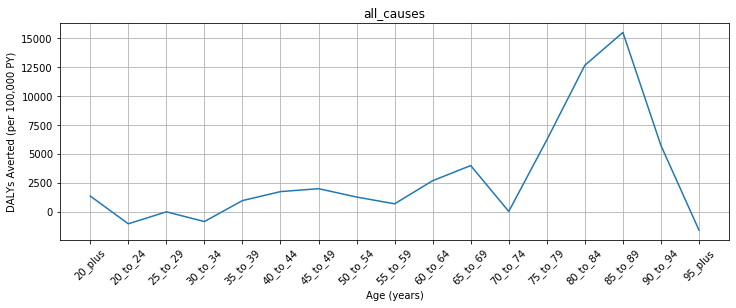

In [212]:
plt.figure(figsize=(12,4))
plt.plot(x.index, x)
plt.ylabel('DALYs Averted (per 100,000 PY)')
plt.xlabel("Age (years)")
plt.grid()
plt.xticks(rotation=45)
plt.title(cause);

In [218]:
cause = 'all_causes'
x = np.round(
    table_shell.query(f'cause == "{cause}" and sex == "Both" and measure == "dalys" and scenario == "treatment"'
                      ' and bmi_group=="(0, 200)"'), 4).loc[:, ('averted', 'mean')]

x.index = ['20_plus', '20_to_24', '25_to_29', '30_to_34', '35_to_39', '40_to_44', '45_to_49', '50_to_54', '55_to_59', '60_to_64', '65_to_69', '70_to_74', '75_to_79', '80_to_84', '85_to_89', '90_to_94', '95_plus']
x

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            190016, 190017, 190018, 190019, 190020, 190021, 190022, 190023,
            190024, 190025],
           dtype='int64', length=190026)

In [226]:
table_shell

value  \
                                                                  mean   
cause        sex  age_group bmi_group measure scenario                   
all_causes   Both 20_plus   (0, 200)  dalys   baseline    21224.077775   
                                              treatment   21951.511814   
                                      ylds    baseline      536.881883   
                                              treatment     516.451104   
...                                                                ...   
other_causes Male 95_plus   (40, 200) dalys   baseline   762391.436025   
                                              treatment   57363.389100   
                                      ylls    baseline   762391.436025   
                                              treatment   57363.389100   

                                                                       \
                                                                 2.5%   
cause        sex  age_group bmi_group measure scenario                  
all_causes   Both 20_plus   (0, 200)  dalys   baseline   18685.801982   
                                              treatment  20530.441617   
                                      ylds    baseline     341.499116   
                                              treatment    395.850874   
...                                                               ...   
other_causes Male 95_plus   (40, 200) dalys   baseline   38119.571801   
                                              treatment  57363.389100   
                                      ylls    baseline   38119.571801   
                                              treatment  57363.389100   

                                                                       \
                                                                97.5%   
cause        sex  age_group bmi_group measure scenario                  
all_causes   Both 20_plus   (0, 200)  dalys   baseline   2.313961e+04   
                                              treatment  2.342430e+04   
                                      ylds    baseline   7.920139e+02   
                                              treatment  6.698312e+02   
...                                                               ...   
other_causes Male 95_plus   (40, 200) dalys   baseline   1.486663e+06   
                                              treatment  5.736339e+04   
                                      ylls    baseline   1.486663e+06   
                                              treatment  5.736339e+04   

                                                          person_time  \
                                                                 mean   
cause        sex  age_group bmi_group measure scenario                  
all_causes   Both 20_plus   (0, 200)  dalys   baseline   62951.869344   
                                              treatment  60169.336071   
                                      ylds    baseline   62951.869344   
                                              treatment  60169.336071   
...                                                               ...   
other_causes Male 95_plus   (40, 200) dalys   baseline       0.059557   
                                              treatment      0.372652   
                                      ylls    baseline       0.059557   
                                              treatment      0.372652   

                                                                       \
                                                                 2.5%   
cause        sex  age_group bmi_group measure scenario                  
all_causes   Both 20_plus   (0, 200)  dalys   baseline   49106.562628   
                                              treatment  49049.845311   
                                      ylds    baseline   49106.562628   
                                              treatment  49049.845311   
...                               

In [233]:
table_shell.columns

MultiIndex(levels=[['person_time', 'value', 'averted'], ['count', 'mean', 'std', 'min', '2.5%', '50%', '97.5%', 'max']],
           codes=[[1, 1, 1, 0, 0, 0, 2, 2, 2], [1, 4, 6, 1, 4, 6, 1, 4, 6]])

In [216]:
plt.figure(figsize=(7.5, 3), dpi=300)
xx = t.index.get_level_values(3)
yy = t.averted_mean
ll = yy - t['averted_2.5%']
uu = t['averted_97.5%'] - yy

plt.bar(xx, yy, yerr=[ll, uu])
plt.xlabel('BMI Group (kg^2/m)')
plt.ylabel('DALYs Averted (per 100,000 PY)');

IndexError: Too many levels: Index has only 1 level, not 4

<Figure size 2250x900 with 0 Axes>